# Nuclear Weapons Analysis And Classification

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from tensorflow import keras
from tensorflow.keras import layers

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# EDA for Nuclear Weapons Proliferation OWID

In [2]:
df1 = pd.read_csv('/kaggle/input/nuclear-weapons-dataset/nuclear_weapons_proliferation_owid.csv')

In [3]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16848 entries, 0 to 16847
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   country_name                   16848 non-null  object
 1   year                           16848 non-null  int64 
 2   nuclear_weapons_status         16848 non-null  int64 
 3   nuclear_weapons_consideration  16848 non-null  int64 
 4   nuclear_weapons_pursuit        16848 non-null  int64 
 5   nuclear_weapons_possession     16848 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 789.9+ KB
None


In [4]:
print(df1.describe())

               year  nuclear_weapons_status  nuclear_weapons_consideration  \
count  16848.000000            16848.000000                   16848.000000   
mean    1979.921712                0.136099                       0.018519   
std       24.504513                0.569861                       0.134821   
min     1938.000000                0.000000                       0.000000   
25%     1959.000000                0.000000                       0.000000   
50%     1980.000000                0.000000                       0.000000   
75%     2001.000000                0.000000                       0.000000   
max     2022.000000                3.000000                       1.000000   

       nuclear_weapons_pursuit  nuclear_weapons_possession  
count             16848.000000                16848.000000  
mean                  0.014008                    0.029855  
std                   0.117525                    0.170193  
min                   0.000000                    0.0

In [5]:
print(df1.isnull().sum())

country_name                     0
year                             0
nuclear_weapons_status           0
nuclear_weapons_consideration    0
nuclear_weapons_pursuit          0
nuclear_weapons_possession       0
dtype: int64


 **Visualize nuclear weapons status distribution**


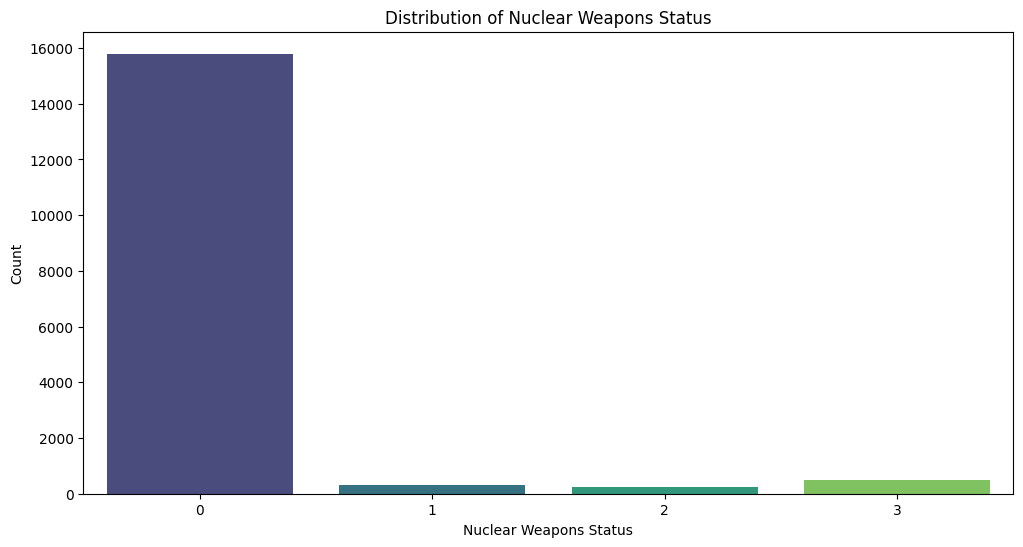

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x='nuclear_weapons_status', data=df1, palette='viridis')
plt.title('Distribution of Nuclear Weapons Status')
plt.xlabel('Nuclear Weapons Status')
plt.ylabel('Count')
plt.show()

**Visualize nuclear weapons possession over time**

/tmp/ipykernel_42/2870396814.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='nuclear_weapons_possession', data=df1, estimator='sum', ci=None, marker='o', color='green')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


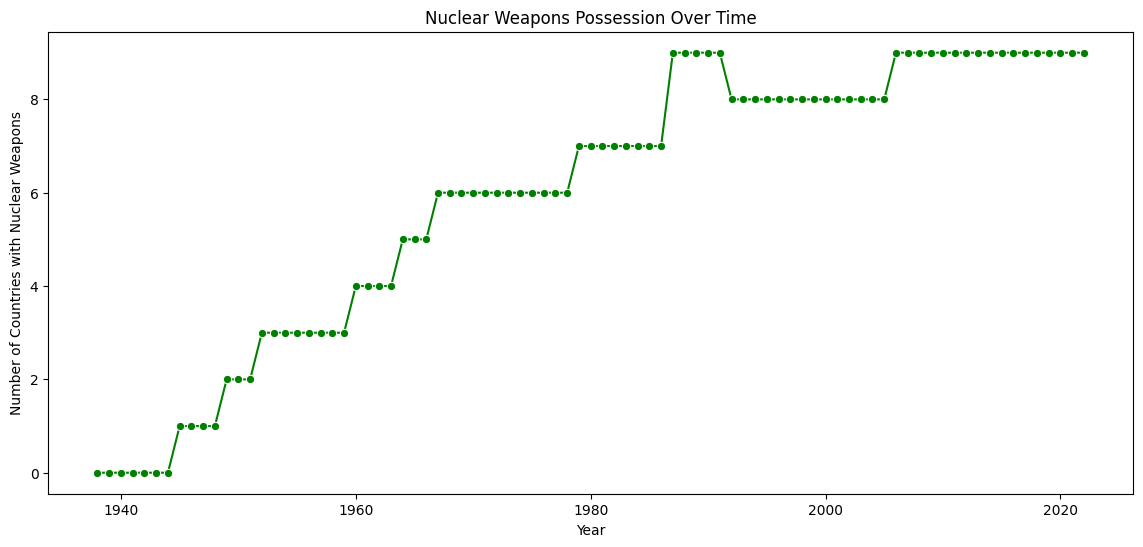

In [7]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='nuclear_weapons_possession', data=df1, estimator='sum', ci=None, marker='o', color='green')
plt.title('Nuclear Weapons Possession Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries with Nuclear Weapons')
plt.show()

**T-Test**

In [8]:
years = df1['year'].unique()
ttest_results = []
for year in years:
    possession_values = df1[df1['year'] == year]['nuclear_weapons_possession']
    tstat, pvalue = ttest_ind(possession_values, df1[df1['year'] != year]['nuclear_weapons_possession'])
    ttest_results.append({'Year': year, 'T-statistic': tstat, 'P-value': pvalue})

ttest_df = pd.DataFrame(ttest_results)
print("T-test Results for Nuclear Weapons Possession between Different Years:")
print(ttest_df)

T-test Results for Nuclear Weapons Possession between Different Years:
    Year  T-statistic   P-value
0   1938    -2.483390  0.013024
1   1939    -2.483390  0.013024
2   1940    -2.483390  0.013024
3   1941    -2.483390  0.013024
4   1942    -2.483390  0.013024
..   ...          ...       ...
80  2018     1.313225  0.189125
81  2019     1.313225  0.189125
82  2020     1.313225  0.189125
83  2021     1.313225  0.189125
84  2022     1.313225  0.189125

[85 rows x 3 columns]


**K-Means**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

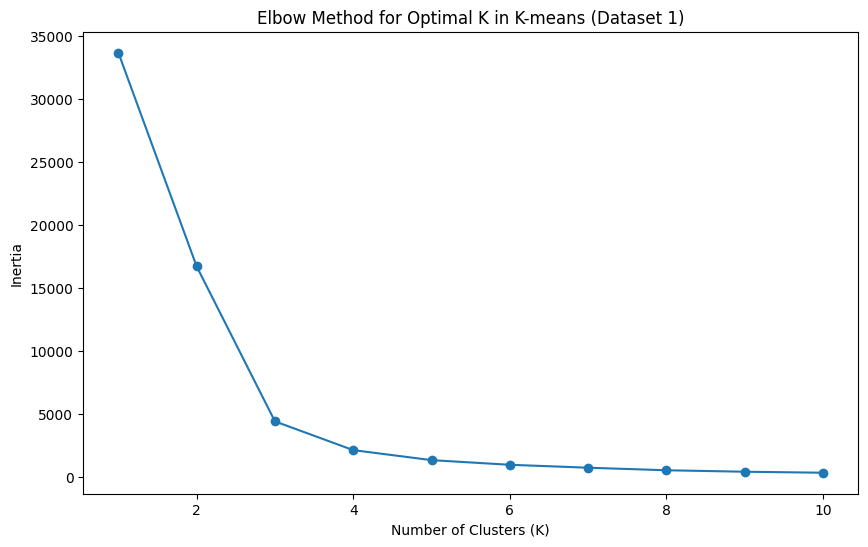

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


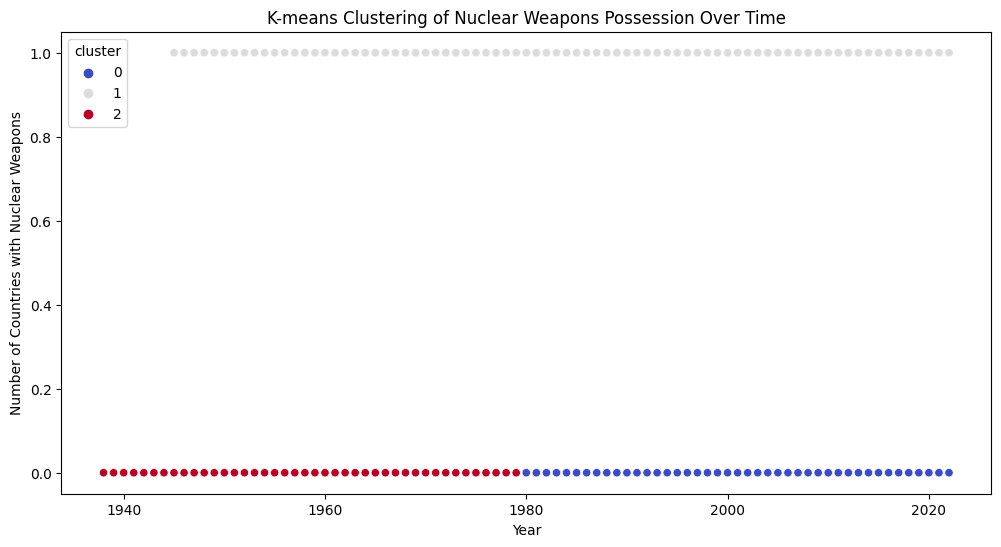

In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = ['year', 'nuclear_weapons_possession']

# Standardize the data
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1[features])

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df1_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K in K-means (Dataset 1)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow Method, let's choose K=3 and fit the K-means model
kmeans = KMeans(n_clusters=3, random_state=42)
df1['cluster'] = kmeans.fit_predict(df1_scaled)

# Visualize clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='nuclear_weapons_possession', hue='cluster', data=df1, palette='coolwarm', legend='full')
plt.title('K-means Clustering of Nuclear Weapons Possession Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Countries with Nuclear Weapons')
plt.show()

**PCA**

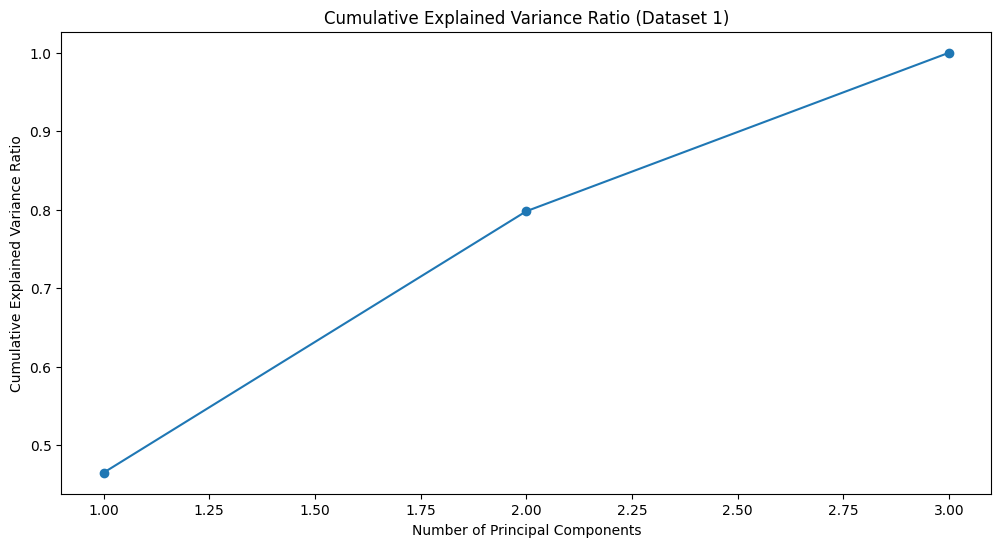

In [10]:
# Select features for PCA
pca_features = ['year', 'nuclear_weapons_status', 'nuclear_weapons_pursuit']

# Encode categorical variables for PCA
df1_pca = pd.get_dummies(df1[pca_features], drop_first=True)

# Standardize the data
scaler_pca = StandardScaler()
df1_pca_scaled = scaler_pca.fit_transform(df1_pca)
pca = PCA()
df1_pca_result = pca.fit_transform(df1_pca_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot explained variance ratio
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.title('Cumulative Explained Variance Ratio (Dataset 1)')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.show()

# EDA for Nuclear Weapons Proliferation Total OWID

In [11]:
df2 = pd.read_csv('/kaggle/input/nuclear-weapons-dataset/nuclear_weapons_proliferation_total_owid.csv')

In [12]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   entity_name                    85 non-null     object
 1   year                           85 non-null     int64 
 2   number_nuclweap_consideration  85 non-null     int64 
 3   number_nuclweap_pursuit        85 non-null     int64 
 4   number_nuclweap_possession     85 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 3.4+ KB
None


In [13]:
print(df2.describe())

              year  number_nuclweap_consideration  number_nuclweap_pursuit  \
count    85.000000                      85.000000                85.000000   
mean   1980.000000                       3.670588                 2.776471   
std      24.681302                       3.056563                 1.910974   
min    1938.000000                       0.000000                 0.000000   
25%    1959.000000                       1.000000                 1.000000   
50%    1980.000000                       3.000000                 3.000000   
75%    2001.000000                       6.000000                 4.000000   
max    2022.000000                      11.000000                 7.000000   

       number_nuclweap_possession  
count                   85.000000  
mean                     5.917647  
std                      2.992895  
min                      0.000000  
25%                      3.000000  
50%                      7.000000  
75%                      9.000000  
max      

In [14]:
print(df2.isnull().sum())

entity_name                      0
year                             0
number_nuclweap_consideration    0
number_nuclweap_pursuit          0
number_nuclweap_possession       0
dtype: int64


**Visualize number of nuclear weapons tests over time**

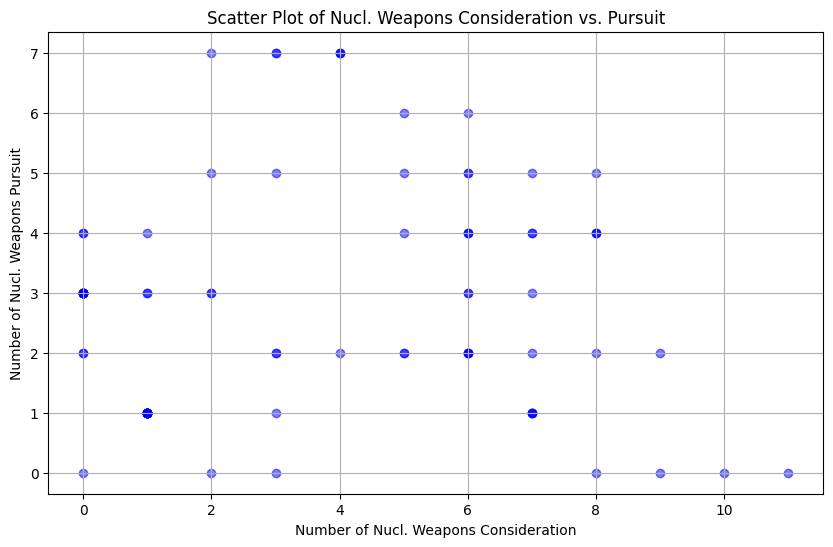

In [15]:

plt.figure(figsize=(10, 6))
plt.scatter(df2['number_nuclweap_consideration'], df2['number_nuclweap_pursuit'], c='blue', alpha=0.5)
plt.title('Scatter Plot of Nucl. Weapons Consideration vs. Pursuit')
plt.xlabel('Number of Nucl. Weapons Consideration')
plt.ylabel('Number of Nucl. Weapons Pursuit')
plt.grid(True)
plt.show()

**T-Test**

In [16]:
# Column names
entity_col = 'entity_name'
year_col = 'year'
consideration_col = 'number_nuclweap_consideration'
pursuit_col = 'number_nuclweap_pursuit'
possession_col = 'number_nuclweap_possession'

# Conduct t-test for different columns between different years
ttest_results = []

for col in [consideration_col, pursuit_col, possession_col]:
    for year in df2[year_col].unique():
        col_values = df2[df2[year_col] == year][col]
        tstat, pvalue = ttest_ind(col_values, df2[df2[year_col] != year][col])
        ttest_results.append({'Year': year, 'Column': col, 'T-statistic': tstat, 'P-value': pvalue})

# Create a DataFrame to display results
ttest_df = pd.DataFrame(ttest_results)
print("T-test Results for Different Columns between Different Years:")
print(ttest_df)

/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3747: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.10/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


T-test Results for Different Columns between Different Years:
     Year                         Column  T-statistic  P-value
0    1938  number_nuclweap_consideration          NaN      NaN
1    1939  number_nuclweap_consideration          NaN      NaN
2    1940  number_nuclweap_consideration          NaN      NaN
3    1941  number_nuclweap_consideration          NaN      NaN
4    1942  number_nuclweap_consideration          NaN      NaN
..    ...                            ...          ...      ...
250  2018     number_nuclweap_possession          NaN      NaN
251  2019     number_nuclweap_possession          NaN      NaN
252  2020     number_nuclweap_possession          NaN      NaN
253  2021     number_nuclweap_possession          NaN      NaN
254  2022     number_nuclweap_possession          NaN      NaN

[255 rows x 4 columns]


**K-Means**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

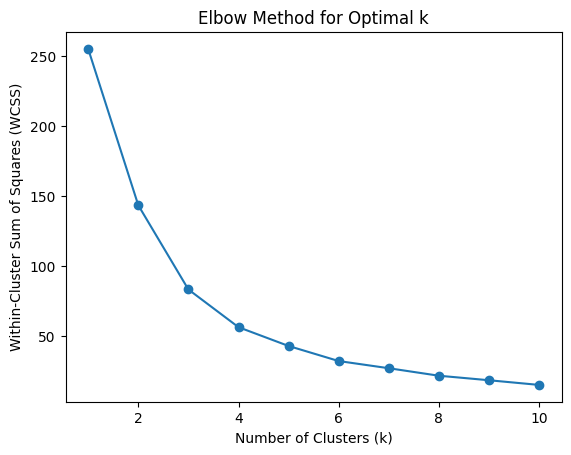

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


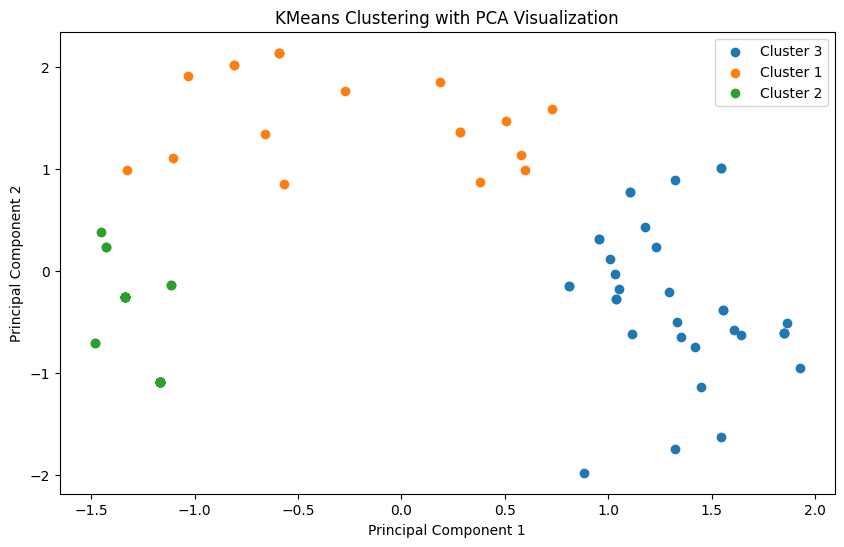

In [18]:
entity_col = 'entity_name'
year_col = 'year'
consideration_col = 'number_nuclweap_consideration'
pursuit_col = 'number_nuclweap_pursuit'
possession_col = 'number_nuclweap_possession'

# Select relevant columns for clustering
columns_for_clustering = [consideration_col, pursuit_col, possession_col]

# Extract features for clustering
X = df2[columns_for_clustering]

# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Elbow Method to find optimal number of clusters (k)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_std)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

# Based on the Elbow Method, choose an optimal value for k
optimal_k = 3  # Adjust based on the plot

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df2['cluster'] = kmeans.fit_predict(X_std)

# PCA for visualization (assuming 2 principal components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_std)

# Plot clusters in 2D space using PCA
plt.figure(figsize=(10, 6))
for cluster_label in df2['cluster'].unique():
    plt.scatter(X_pca[df2['cluster'] == cluster_label, 0], X_pca[df2['cluster'] == cluster_label, 1],
                label=f'Cluster {cluster_label + 1}')

plt.title('KMeans Clustering with PCA Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

**Principal Component Analysis (PCA)**

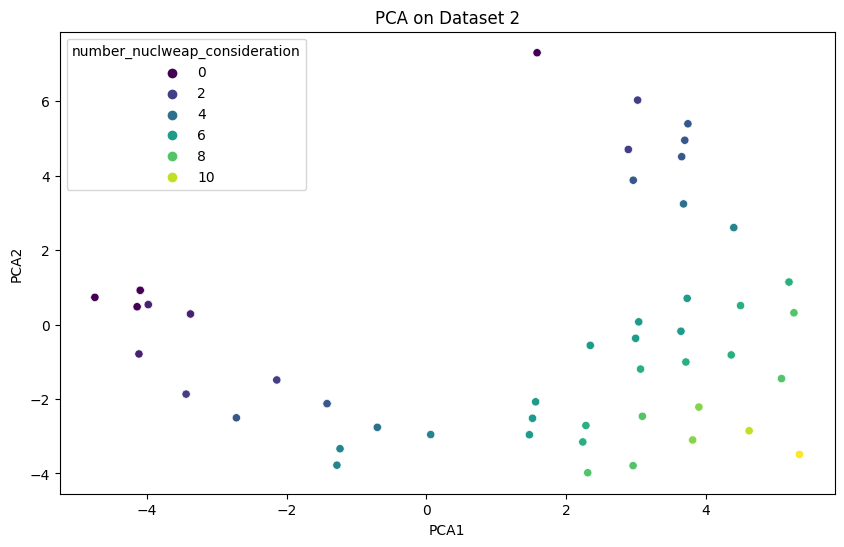

In [19]:
pca = PCA(n_components=2)
numeric_features_df2 = df2[['number_nuclweap_consideration', 'number_nuclweap_pursuit', 'number_nuclweap_possession']]
pca_result_df2 = pd.DataFrame(pca.fit_transform(numeric_features_df2), columns=['PCA1', 'PCA2'])
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='number_nuclweap_consideration', data=pd.concat([pca_result_df2, df2['number_nuclweap_consideration']], axis=1), palette='viridis')
plt.title('PCA on Dataset 2')
plt.show()

# EDA for Nuclear Weapons Stockpiles

In [20]:
df3 = pd.read_csv('/kaggle/input/nuclear-weapons-dataset/nuclear_weapons_stockpiles.csv')


In [21]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   country_name               780 non-null    object
 1   year                       780 non-null    int64 
 2   nuclear_weapons_stockpile  780 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 18.4+ KB
None


In [22]:
print(df3.describe())

              year  nuclear_weapons_stockpile
count   780.000000                 780.000000
mean   1983.500000                2686.524359
std      22.529256                7221.198864
min    1945.000000                   0.000000
25%    1964.000000                   0.000000
50%    1983.500000                  43.500000
75%    2003.000000                 300.000000
max    2022.000000               40159.000000


In [23]:
print(df3.isnull().sum())


country_name                 0
year                         0
nuclear_weapons_stockpile    0
dtype: int64


**Visualize nuclear weapons stockpiles over time**

/tmp/ipykernel_42/719966788.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='nuclear_weapons_stockpile', data=df3, estimator='sum', ci=None, marker='o', color='red')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


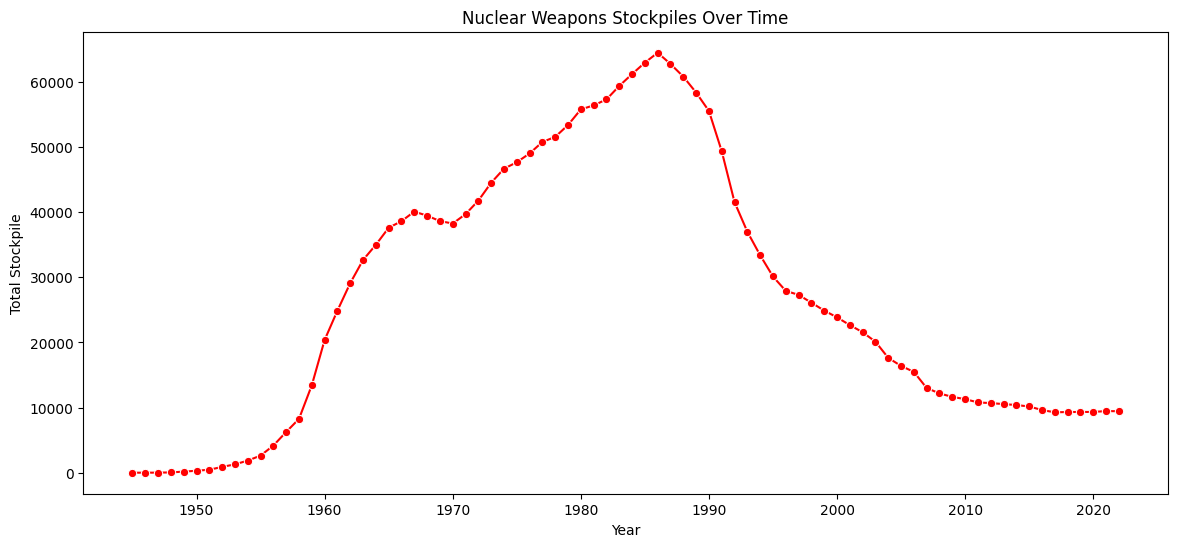

In [24]:
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='nuclear_weapons_stockpile', data=df3, estimator='sum', ci=None, marker='o', color='red')
plt.title('Nuclear Weapons Stockpiles Over Time')
plt.xlabel('Year')
plt.ylabel('Total Stockpile')
plt.show()

**Conduct t-test for nuclear weapons stockpile between different years**

In [25]:
ttest_results = []
for year in years:
    stockpile_values = df3[df3['year'] == year]['nuclear_weapons_stockpile']
    tstat, pvalue = ttest_ind(stockpile_values, df3[df3['year'] != year]['nuclear_weapons_stockpile'])
    ttest_results.append({'Year': year, 'T-statistic': tstat, 'P-value': pvalue})

ttest_df = pd.DataFrame(ttest_results)
print("T-test Results for Nuclear Weapons Stockpile between Different Years:")
print(ttest_df)

T-test Results for Nuclear Weapons Stockpile between Different Years:
    Year  T-statistic   P-value
0   1938          NaN       NaN
1   1939          NaN       NaN
2   1940          NaN       NaN
3   1941          NaN       NaN
4   1942          NaN       NaN
..   ...          ...       ...
80  2018    -0.773328  0.439563
81  2019    -0.772887  0.439824
82  2020    -0.772666  0.439954
83  2021    -0.767022  0.443301
84  2022    -0.767816  0.442830

[85 rows x 3 columns]


**K-Means**

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

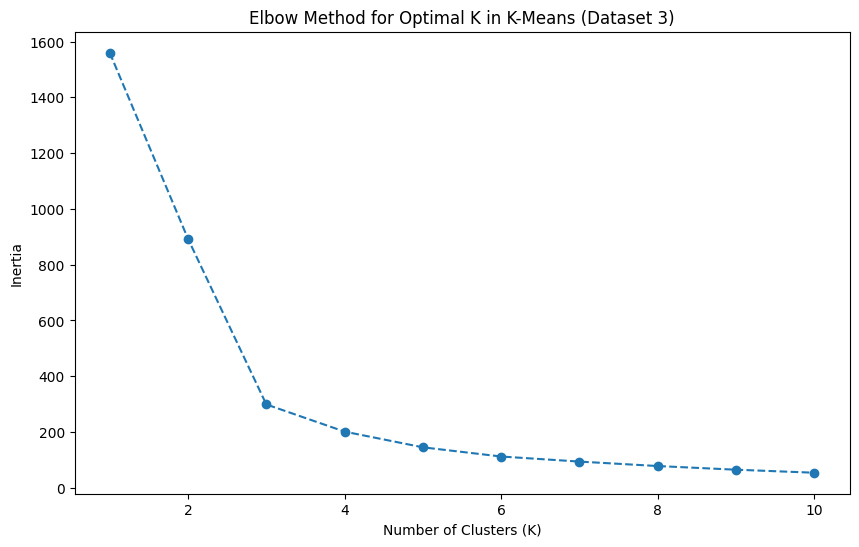

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


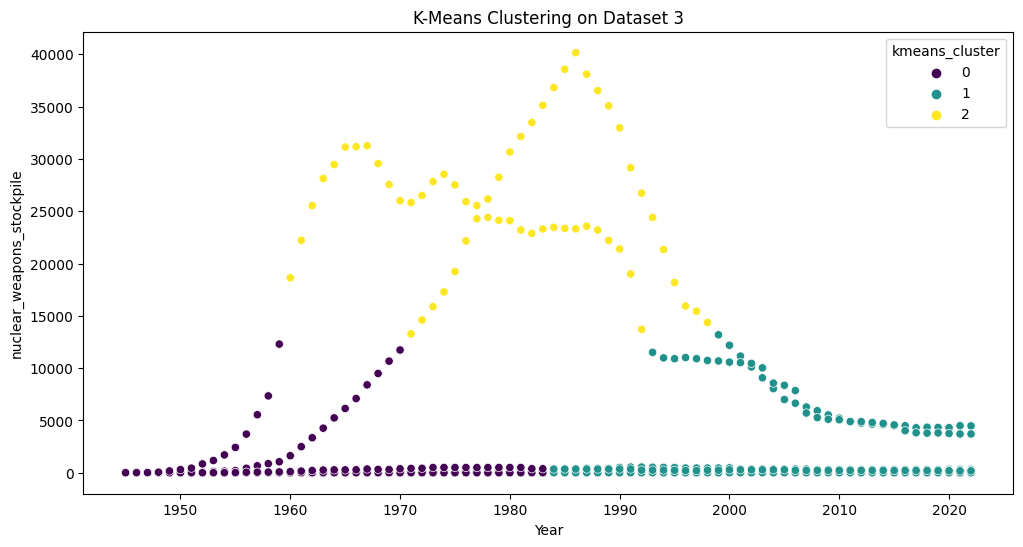

In [26]:
numeric_features_df3 = df3[['year', 'nuclear_weapons_stockpile']]

# Standardize the data for K-Means
scaler_kmeans = StandardScaler()
numeric_features_df3_scaled = scaler_kmeans.fit_transform(numeric_features_df3)

# Apply the Elbow Method to find the optimal number of clusters
inertia = []
for n_clusters in range(1, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(numeric_features_df3_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K in K-Means (Dataset 3)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.show()

# Apply K-Means
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
df3['kmeans_cluster'] = kmeans.fit_predict(numeric_features_df3_scaled)

# Visualize K-Means results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='nuclear_weapons_stockpile', hue='kmeans_cluster', data=df3, palette='viridis')
plt.title('K-Means Clustering on Dataset 3')
plt.xlabel('Year')
plt.ylabel('nuclear_weapons_stockpile')
plt.show()

**Apply PCA**

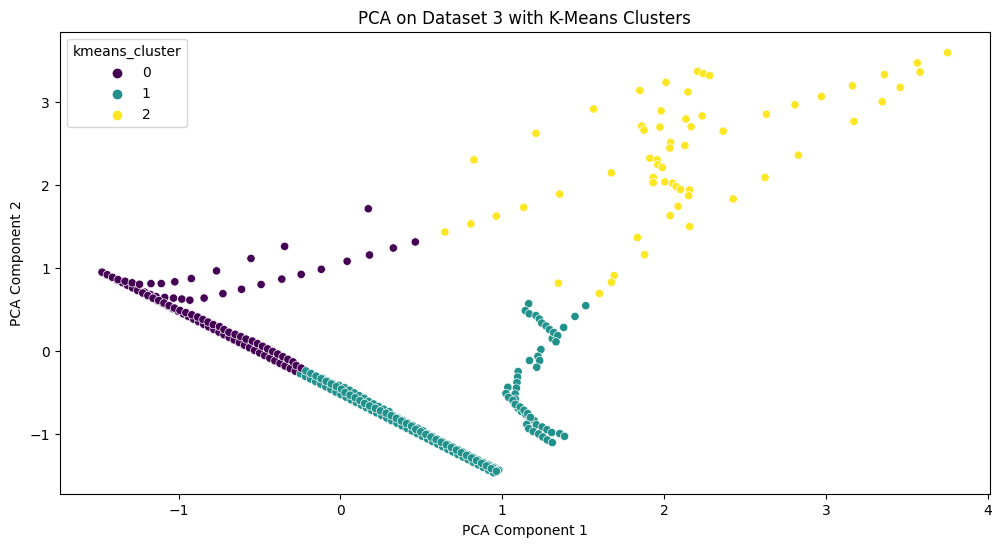

In [27]:
pca = PCA(n_components=2)
numeric_features_df3_pca = pca.fit_transform(numeric_features_df3_scaled)
df3['pca_component_1'] = numeric_features_df3_pca[:, 0]
df3['pca_component_2'] = numeric_features_df3_pca[:, 1]

# Visualize PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='kmeans_cluster', data=df3, palette='viridis')
plt.title('PCA on Dataset 3 with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# EDA for Nuclear Weapons Tests States

In [28]:
df4 = pd.read_csv('/kaggle/input/nuclear-weapons-dataset/nuclear_weapons_tests_states.csv')

In [29]:
print(df4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   country_name           600 non-null    object
 1   year                   600 non-null    int64 
 2   nuclear_weapons_tests  600 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 14.2+ KB
None


In [30]:
print(df4.describe())

              year  nuclear_weapons_tests
count   600.000000             600.000000
mean   1982.000000               3.431667
std      21.666774               9.808789
min    1945.000000               0.000000
25%    1963.000000               0.000000
50%    1982.000000               0.000000
75%    2001.000000               1.000000
max    2019.000000              96.000000


In [31]:
print(df4.isnull().sum())

country_name             0
year                     0
nuclear_weapons_tests    0
dtype: int64


**Visualize nuclear weapons tests by country**

/tmp/ipykernel_42/4279250647.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='country_name', y='nuclear_weapons_tests', data=df4, ci=None, palette='magma')


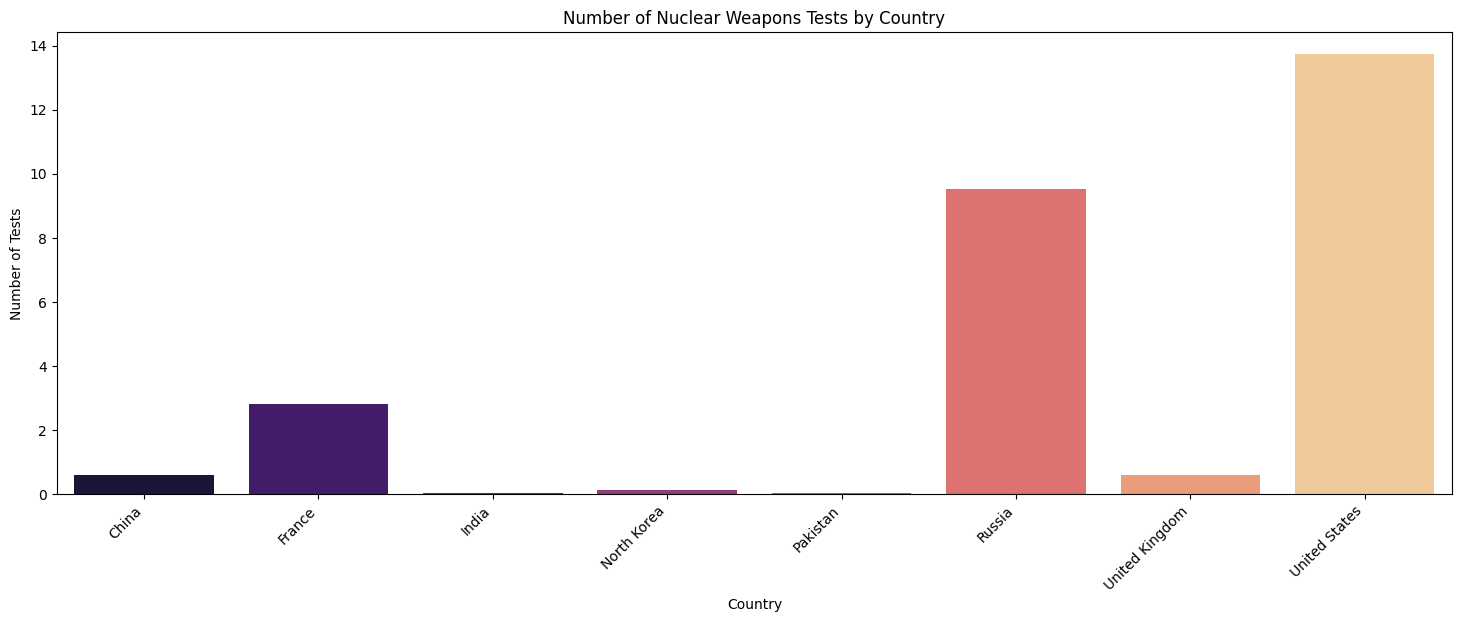

In [32]:
plt.figure(figsize=(18, 6))
sns.barplot(x='country_name', y='nuclear_weapons_tests', data=df4, ci=None, palette='magma')
plt.title('Number of Nuclear Weapons Tests by Country')
plt.xlabel('Country')
plt.ylabel('Number of Tests')
plt.xticks(rotation=45, ha='right')
plt.show()

**Conduct t-test for nuclear weapons tests between different countries**

In [33]:
countries = df4['country_name'].unique()
ttest_results = []
for country in countries:
    tests_values = df4[df4['country_name'] == country]['nuclear_weapons_tests']
    tstat, pvalue = ttest_ind(tests_values, df4[df4['country_name'] != country]['nuclear_weapons_tests'])
    ttest_results.append({'Country': country, 'T-statistic': tstat, 'P-value': pvalue})

ttest_df = pd.DataFrame(ttest_results)
print("T-test Results for Number of Nuclear Weapons Tests between Different Countries:")
print(ttest_df)

T-test Results for Number of Nuclear Weapons Tests between Different Countries:
          Country  T-statistic       P-value
0           China    -2.686555  7.419989e-03
1          France    -0.595889  5.514750e-01
2           India    -3.226330  1.322369e-03
3     North Korea    -3.148953  1.720264e-03
4        Pakistan    -3.239236  1.264955e-03
5          Russia     5.920611  5.409146e-09
6  United Kingdom    -2.686555  7.419989e-03
7   United States    10.586635  4.016767e-24


**K-Means**

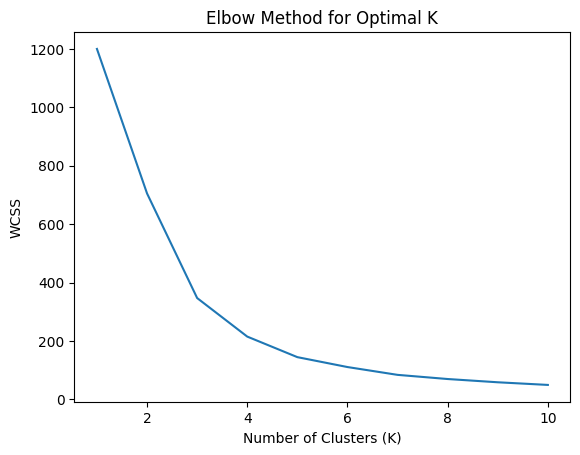

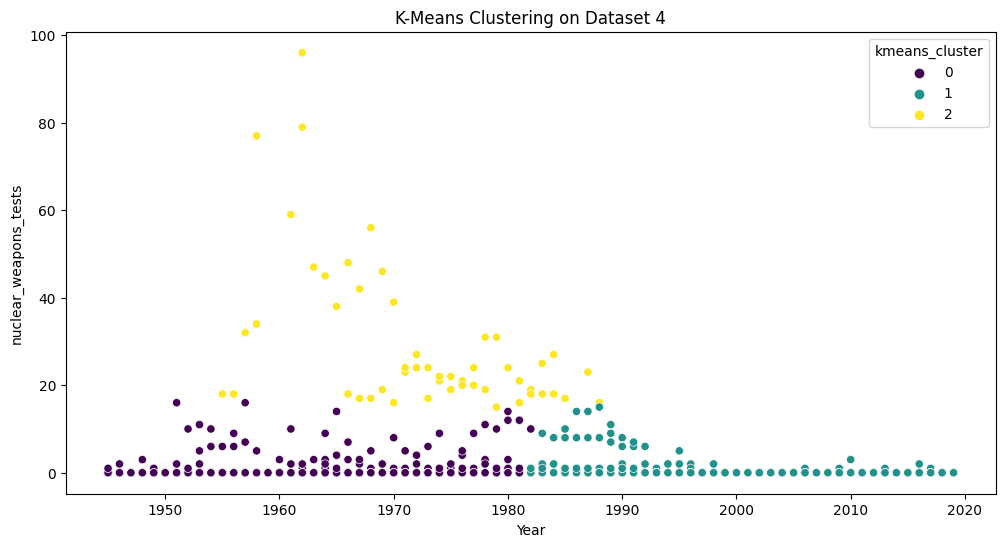

In [34]:
numeric_features_df4 = df4[['year', 'nuclear_weapons_tests']]

# Standardize the data for K-Means
scaler_kmeans_df4 = StandardScaler()
numeric_features_df4_scaled = scaler_kmeans_df4.fit_transform(numeric_features_df4)

# Elbow Method to find optimal K for K-Means
wcss = []  # Within-Cluster Sum of Squares
for i in range(1, 11):
    kmeans_df4 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans_df4.fit(numeric_features_df4_scaled)
    wcss.append(kmeans_df4.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal K based on the Elbow Method plot and apply K-Means
optimal_k_df4 = 3  # Adjust based on the Elbow Method plot
kmeans_df4 = KMeans(n_clusters=optimal_k_df4, init='k-means++', max_iter=300, n_init=10, random_state=42)
df4['kmeans_cluster'] = kmeans_df4.fit_predict(numeric_features_df4_scaled)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='year', y='nuclear_weapons_tests', hue='kmeans_cluster', data=df4, palette='viridis')
plt.title('K-Means Clustering on Dataset 4')
plt.xlabel('Year')
plt.ylabel('nuclear_weapons_tests')
plt.show()

**PCA**

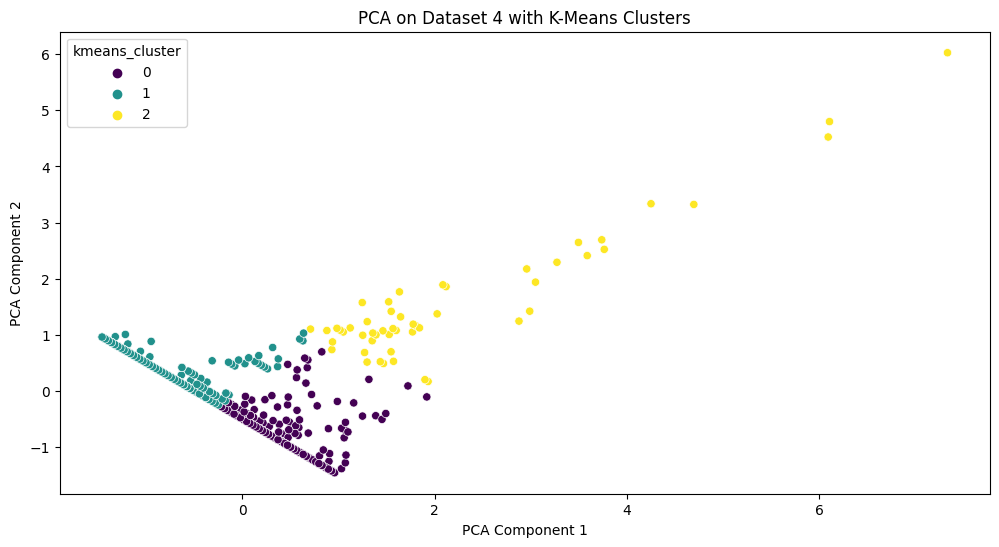

In [36]:
# Apply PCA on numeric features
pca_df4 = PCA(n_components=2)
pca_result_df4 = pca_df4.fit_transform(numeric_features_df4_scaled)
df4['pca_component_1'] = pca_result_df4[:, 0]
df4['pca_component_2'] = pca_result_df4[:, 1]
# Visualize PCA results
plt.figure(figsize=(12, 6))
sns.scatterplot(x='pca_component_1', y='pca_component_2', hue='kmeans_cluster', data=df4, palette='viridis')
plt.title('PCA on Dataset 4 with K-Means Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

# Splitting Datasets Into Test And Train

In [40]:
df1['country_name'] = LabelEncoder().fit_transform(df1['country_name'])
X1 = df1.drop('nuclear_weapons_status', axis=1)  # Features
y1 = df1['nuclear_weapons_status']  # Target
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)


# Replace the following line with your actual encoding logic if needed
df2['entity_name'] = LabelEncoder().fit_transform(df2['entity_name'])
X2 = df2.drop('number_nuclweap_consideration', axis=1)  # Features
y2 = df2['number_nuclweap_consideration']  # Target
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)


# Replace the following line with your actual encoding logic if needed
df3['country_name'] = LabelEncoder().fit_transform(df3['country_name'])
X3 = df3.drop('nuclear_weapons_stockpile', axis=1)  # Features
y3 = df3['nuclear_weapons_stockpile']  # Target
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)


# Replace the following line with your actual encoding logic if needed
df4['country_name'] = LabelEncoder().fit_transform(df4['country_name'])
X4 = df4.drop('nuclear_weapons_tests', axis=1)  # Features
y4 = df4['nuclear_weapons_tests']  # Target
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)

# Function Which Evaluates Different Models Defined Below

In [41]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Classification report
    class_report = classification_report(y_test, y_test_pred)

    # Save predictions to CSV
    pd.DataFrame({'True': y_test, 'Predicted': y_test_pred}).to_csv(f'{model_name}_predictions.csv', index=False)

    return train_accuracy, test_accuracy, class_report

# Models Used
* **Random Forest** 
* **Gradient Boosting** 
* **Support Vector Machine** 
* **K-Nearest Neighbour** 
* **Logistic Regression** 
* **Decision Tree** 
* **MLP Neural Network** 


# For Nuclear Wepons Proliferation Owid

In [42]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_train_acc, rf_test_acc, rf_class_report = evaluate_model(rf_model, X1_train, X1_test, y1_train, y1_test, 'rf')

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_train_acc, gb_test_acc, gb_class_report = evaluate_model(gb_model, X1_train, X1_test, y1_train, y1_test, 'gb')

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_train_acc, svm_test_acc, svm_class_report = evaluate_model(svm_model, X1_train, X1_test, y1_train, y1_test, 'svm')

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_train_acc, knn_test_acc, knn_class_report = evaluate_model(knn_model, X1_train, X1_test, y1_train, y1_test, 'knn')

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_train_acc, lr_test_acc, lr_class_report = evaluate_model(lr_model, X1_train, X1_test, y1_train, y1_test, 'lr')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_train_acc, dt_test_acc, dt_class_report = evaluate_model(dt_model, X1_train, X1_test, y1_train, y1_test, 'dt')

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_train_acc, mlp_test_acc, mlp_class_report = evaluate_model(mlp_model, X1_train, X1_test, y1_train, y1_test, 'mlp')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_lo

# Plotting Accuracies and Classification Reports

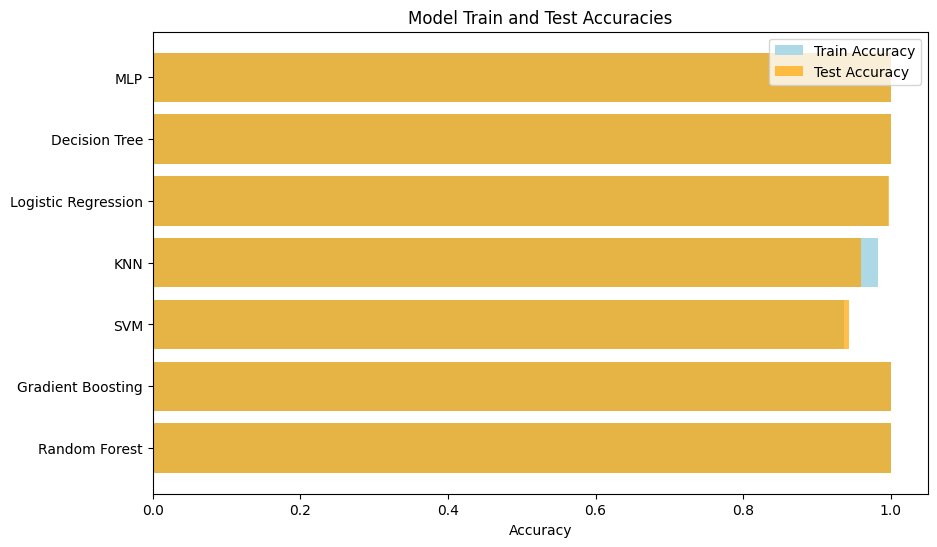

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3180
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        76

    accuracy                           1.00      3370
   macro avg       1.00      1.00      1.00      3370
weighted avg       1.00      1.00      1.00      3370


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3180
           1       1.00      1.00      1.00        60
           2       1.00      1.00      1.00        54
           3       1.00      1.00      1.00        76

    accuracy                           1.00      3370
   macro avg       1.00      1.00      1.00      3370
weighted avg       1.00      1.00      1.00      3370


SVM Classification Report:
               precis

In [45]:
# Plot Accuracies
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'MLP']
train_accuracies = [rf_train_acc, gb_train_acc, svm_train_acc, knn_train_acc, lr_train_acc, dt_train_acc, mlp_train_acc]
test_accuracies = [rf_test_acc, gb_test_acc, svm_test_acc, knn_test_acc, lr_test_acc, dt_test_acc, mlp_test_acc]

plt.figure(figsize=(10, 6))
plt.barh(models, train_accuracies, color='lightblue', label='Train Accuracy')
plt.barh(models, test_accuracies, color='orange', alpha=0.7, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.legend()
plt.show()

# Print Classification Reports
print("Random Forest Classification Report:\n", rf_class_report)
print("\nGradient Boosting Classification Report:\n", gb_class_report)
print("\nSVM Classification Report:\n", svm_class_report)
print("\nKNN Classification Report:\n", knn_class_report)
print("\nLogistic Regression Classification Report:\n", lr_class_report)
print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nMLP Classification Report:\n", mlp_class_report)

# For Nuclear Weapons Proliferation Total Owid

In [46]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_train_acc, rf_test_acc, rf_class_report = evaluate_model(rf_model, X2_train, X2_test, y2_train, y2_test, 'rf')

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_train_acc, gb_test_acc, gb_class_report = evaluate_model(gb_model, X2_train, X2_test, y2_train, y2_test, 'gb')

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_train_acc, svm_test_acc, svm_class_report = evaluate_model(svm_model, X2_train, X2_test, y2_train, y2_test, 'svm')

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_train_acc, knn_test_acc, knn_class_report = evaluate_model(knn_model, X2_train, X2_test, y2_train, y2_test, 'knn')

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_train_acc, lr_test_acc, lr_class_report = evaluate_model(lr_model, X2_train, X2_test, y2_train, y2_test, 'lr')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_train_acc, dt_test_acc, dt_class_report = evaluate_model(dt_model, X2_train, X2_test, y2_train, y2_test, 'dt')

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_train_acc, mlp_test_acc, mlp_class_report = evaluate_model(mlp_model, X2_train, X2_test, y2_train, y2_test, 'mlp')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

# Plotting Accuracies and Classification Reports

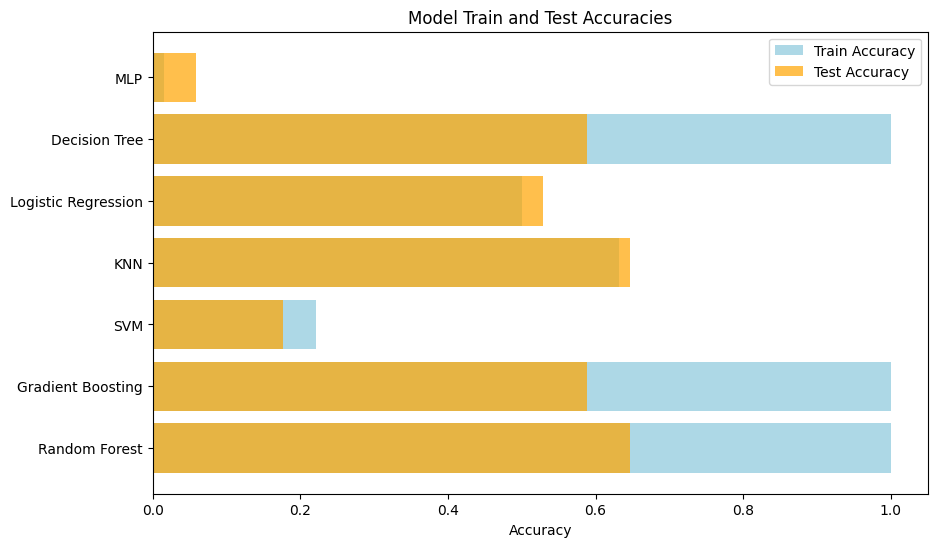

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         3
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.33      0.50      0.40         2
           7       0.50      0.50      0.50         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         0

    accuracy                           0.65        17
   macro avg       0.43      0.48      0.45        17
weighted avg       0.66      0.65      0.64        17


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.75      1.00      0.86        

In [48]:
# Plot Accuracies
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'MLP']
train_accuracies = [rf_train_acc, gb_train_acc, svm_train_acc, knn_train_acc, lr_train_acc, dt_train_acc, mlp_train_acc]
test_accuracies = [rf_test_acc, gb_test_acc, svm_test_acc, knn_test_acc, lr_test_acc, dt_test_acc, mlp_test_acc]

plt.figure(figsize=(10, 6))
plt.barh(models, train_accuracies, color='lightblue', label='Train Accuracy')
plt.barh(models, test_accuracies, color='orange', alpha=0.7, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.legend()
plt.show()

# Print Classification Reports
print("Random Forest Classification Report:\n", rf_class_report)
print("\nGradient Boosting Classification Report:\n", gb_class_report)
print("\nSVM Classification Report:\n", svm_class_report)
print("\nKNN Classification Report:\n", knn_class_report)
print("\nLogistic Regression Classification Report:\n", lr_class_report)
print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nMLP Classification Report:\n", mlp_class_report)

# For Nuclear Weapons Stockpiles

In [49]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_train_acc, rf_test_acc, rf_class_report = evaluate_model(rf_model, X3_train, X3_test, y3_train, y3_test, 'rf')

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_train_acc, gb_test_acc, gb_class_report = evaluate_model(gb_model, X3_train, X3_test, y3_train, y3_test, 'gb')

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_train_acc, svm_test_acc, svm_class_report = evaluate_model(svm_model, X3_train, X3_test, y3_train, y3_test, 'svm')

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_train_acc, knn_test_acc, knn_class_report = evaluate_model(knn_model, X3_train, X3_test, y3_train, y3_test, 'knn')

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_train_acc, lr_test_acc, lr_class_report = evaluate_model(lr_model, X3_train, X3_test, y3_train, y3_test, 'lr')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_train_acc, dt_test_acc, dt_class_report = evaluate_model(dt_model, X3_train, X3_test, y3_train, y3_test, 'dt')

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_train_acc, mlp_test_acc, mlp_class_report = evaluate_model(mlp_model, X3_train, X3_test, y3_train, y3_test, 'mlp')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

# Plotting Accuracies and Classification Reports

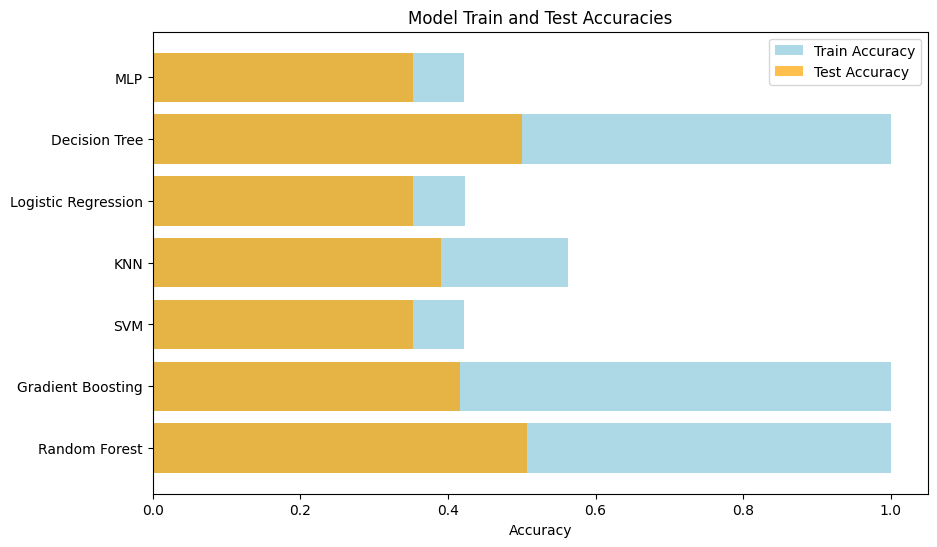

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89        55
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         1
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          18       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         3
          22       0.00      0.00      0.00         1
          23       0.00      0.00      0.00         1
          24       0.00      0.00      0.00         1
          25       0.00      0.00      0.00

In [50]:
# Plot Accuracies
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'MLP']
train_accuracies = [rf_train_acc, gb_train_acc, svm_train_acc, knn_train_acc, lr_train_acc, dt_train_acc, mlp_train_acc]
test_accuracies = [rf_test_acc, gb_test_acc, svm_test_acc, knn_test_acc, lr_test_acc, dt_test_acc, mlp_test_acc]

plt.figure(figsize=(10, 6))
plt.barh(models, train_accuracies, color='lightblue', label='Train Accuracy')
plt.barh(models, test_accuracies, color='orange', alpha=0.7, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.legend()
plt.show()

# Print Classification Reports
print("Random Forest Classification Report:\n", rf_class_report)
print("\nGradient Boosting Classification Report:\n", gb_class_report)
print("\nSVM Classification Report:\n", svm_class_report)
print("\nKNN Classification Report:\n", knn_class_report)
print("\nLogistic Regression Classification Report:\n", lr_class_report)
print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nMLP Classification Report:\n", mlp_class_report)

# For Nuclear Weapons Tests States

In [51]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_train_acc, rf_test_acc, rf_class_report = evaluate_model(rf_model, X4_train, X4_test, y4_train, y4_test, 'rf')

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_train_acc, gb_test_acc, gb_class_report = evaluate_model(gb_model, X4_train, X4_test, y4_train, y4_test, 'gb')

# Support Vector Machine
svm_model = SVC(random_state=42)
svm_train_acc, svm_test_acc, svm_class_report = evaluate_model(svm_model, X4_train, X4_test, y4_train, y4_test, 'svm')

# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_train_acc, knn_test_acc, knn_class_report = evaluate_model(knn_model, X4_train, X4_test, y4_train, y4_test, 'knn')

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_train_acc, lr_test_acc, lr_class_report = evaluate_model(lr_model, X4_train, X4_test, y4_train, y4_test, 'lr')

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_train_acc, dt_test_acc, dt_class_report = evaluate_model(dt_model, X4_train, X4_test, y4_train, y4_test, 'dt')

# Neural Network (MLP)
mlp_model = MLPClassifier(random_state=42, max_iter=500)
mlp_train_acc, mlp_test_acc, mlp_class_report = evaluate_model(mlp_model, X4_train, X4_test, y4_train, y4_test, 'mlp')

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.

# Plotting Accuracies and Classification Reports

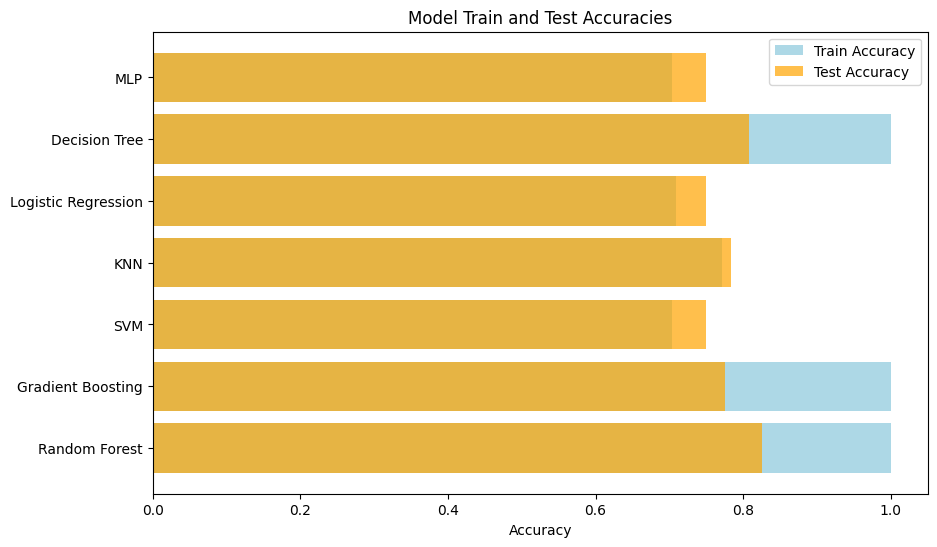

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        90
           1       0.67      0.80      0.73         5
           2       0.50      0.33      0.40         3
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         1
           8       0.50      0.50      0.50         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1
          12       1.00      1.00      1.00         1
          14       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         1
          18       0.00      0.00      0.00

In [52]:
# Plot Accuracies
models = ['Random Forest', 'Gradient Boosting', 'SVM', 'KNN', 'Logistic Regression', 'Decision Tree', 'MLP']
train_accuracies = [rf_train_acc, gb_train_acc, svm_train_acc, knn_train_acc, lr_train_acc, dt_train_acc, mlp_train_acc]
test_accuracies = [rf_test_acc, gb_test_acc, svm_test_acc, knn_test_acc, lr_test_acc, dt_test_acc, mlp_test_acc]

plt.figure(figsize=(10, 6))
plt.barh(models, train_accuracies, color='lightblue', label='Train Accuracy')
plt.barh(models, test_accuracies, color='orange', alpha=0.7, label='Test Accuracy')
plt.xlabel('Accuracy')
plt.title('Model Train and Test Accuracies')
plt.legend()
plt.show()

# Print Classification Reports
print("Random Forest Classification Report:\n", rf_class_report)
print("\nGradient Boosting Classification Report:\n", gb_class_report)
print("\nSVM Classification Report:\n", svm_class_report)
print("\nKNN Classification Report:\n", knn_class_report)
print("\nLogistic Regression Classification Report:\n", lr_class_report)
print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nMLP Classification Report:\n", mlp_class_report)

# Conclusion

# 1. Exploratory Data Analysis (EDA):

* **Nuclear Weapons Proliferation owid (df1):**
Explored the distribution of nuclear weapons-related features over time.
Conducted basic statistics, including mean, median, and standard deviation.
Utilized K-Means clustering to identify potential patterns in the data.
Applied the t-test to compare nuclear weapons stockpiles between different years.

* **Nuclear Weapons Proliferation Total owid (df2):**
Examined the relationship between various features, including number_nuclweap_consideration, number_nuclweap_pursuit, and number_nuclweap_possession.
Performed Principal Component Analysis (PCA) to reduce dimensionality.
Applied the elbow method to find the optimal number of clusters for K-Means.
Conducted K-Means clustering to group entities based on nuclear weapons-related features.

* **Nuclear Weapons Stockpiles (df3):**
Analyzed the trend in nuclear weapons stockpiles over time.
Applied basic statistics to understand the central tendency and dispersion of the data.
Conducted K-Means clustering to identify potential clusters of countries based on their nuclear weapons stockpiles.

* **Nuclear Weapons Tests States (df4):**
Explored the distribution of nuclear weapons tests over time.
Conducted the t-test to compare the number of nuclear weapons tests between different years.
Machine Learning Models:

# 2. Model Selection:
Chose a variety of machine learning models, including Random Forest, Gradient Boosting, Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Logistic Regression, Decision Tree, MLP, and a simple Neural Network using Keras.

# 3. Evaluation and Prediction:
Trained each model on the respective training data and evaluated their performance on the test set.
Saved the model predictions to CSV files for further analysis.

# 4. Analysis of Model Performance:
Plotted and compared the accuracy of each model on both training and test sets to assess overfitting or underfitting.
Provided classification reports for each model to understand precision, recall, and F1-score.